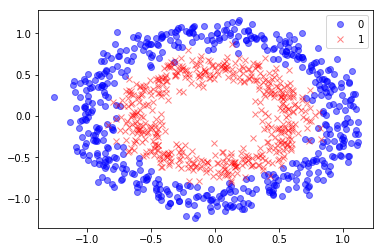

In [13]:
from sklearn.datasets import make_circles
import numpy as np 
import matplotlib.pyplot as plt 
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

#   plot the data on a figure
def plot_data(pl, X, y):
    # plot class where y==0
    pl.plot(X[y==0, 0], X[y==0,1], 'ob', alpha=0.5)
    # plot class where y==1
    pl.plot(X[y==1, 0], X[y==1,1], 'xr', alpha=0.5)
    pl.legend(['0', '1'])
    return pl

#   Common function that draws the decision boundaries
def plot_decision_boundary(model, X, y):

    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    # make prediction with the model and reshape the output so contourf can plot it
    c = model.predict(ab)
    Z = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    # plot the contour
    plt.contourf(aa, bb, Z, cmap='bwr', alpha=0.2)
    # plot the moons of data
    plot_data(plt, X, y)

    return plt

x, y = make_circles(n_samples=1000, noise=0.1, random_state=42, factor=.6)

plot_data(plt, x, y).show()

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [14]:
# use API function to construct model

from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam

input = Input(shape=(2,), name="Input")
h = Dense(4, activation="tanh", name="Hidden_1")(input)
h = Dense(4, activation="tanh", name="Hidden_2")(h)

o = Dense(1, activation="sigmoid", name="sigmoid")(h)

model = Model(inputs = input, outputs = o)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 2)                 0         
_________________________________________________________________
Hidden_1 (Dense)             (None, 4)                 12        
_________________________________________________________________
Hidden_2 (Dense)             (None, 4)                 20        
_________________________________________________________________
sigmoid (Dense)              (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [15]:
from keras.utils import plot_model
plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

D:\Anaconda2\envs\py3.6\lib\site-packages\keras\callbacks.py:502: RuntimeWarning: EarlyStopping mode <built-in function max> is unknown, fallback to auto mode.
  RuntimeWarning)


Train on 700 samples, validate on 300 samples
Epoch 1/100
700/700 [==============================] - 0s 549us/step - loss: 0.6966 - acc: 0.5186 - val_loss: 0.6871 - val_acc: 0.5500
Epoch 2/100
700/700 [==============================] - 0s 41us/step - loss: 0.6690 - acc: 0.5943 - val_loss: 0.6475 - val_acc: 0.6200
Epoch 3/100
700/700 [==============================] - 0s 46us/step - loss: 0.5798 - acc: 0.7129 - val_loss: 0.5221 - val_acc: 0.8367
Epoch 4/100
700/700 [==============================] - 0s 38us/step - loss: 0.3797 - acc: 0.9086 - val_loss: 0.3357 - val_acc: 0.8533
Epoch 5/100
700/700 [==============================] - 0s 41us/step - loss: 0.2193 - acc: 0.9414 - val_loss: 0.2392 - val_acc: 0.8767
Epoch 6/100
700/700 [==============================] - 0s 41us/step - loss: 0.1478 - acc: 0.9486 - val_loss: 0.1989 - val_acc: 0.9167
Epoch 7/100
700/700 [==============================] - 0s 40us/step - loss: 0.1288 - acc: 0.9557 - val_loss: 0.2220 - val_acc: 0.9067
Epoch 8/100
700

<module 'matplotlib.pyplot' from 'D:\\Anaconda2\\envs\\py3.6\\lib\\site-packages\\matplotlib\\pyplot.py'>

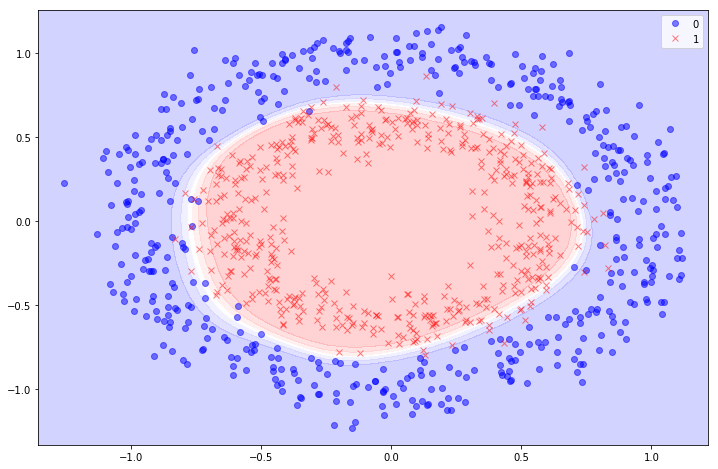

In [16]:
from keras.callbacks import EarlyStopping
my_callbacks = [EarlyStopping(monitor="val_acc", patience=5, mode=max)]

model.compile(Adam(lr=0.05), loss="binary_crossentropy", metrics=["accuracy"])

model.fit(x_train, y_train, epochs=100, verbose=1, callbacks=my_callbacks, validation_data=(x_test, y_test))

eval_result = model.evaluate(x_test, y_test)

print("\n\nTest loss:", eval_result[0], "Test accuracy:", eval_result[1])

plot_decision_boundary(model, x, y)
